### Contents :
    A brief overview of Theano
    
    Importing of libraries that we will use in this demo
    
    1. Steps involved in Theano - Scalar addition and beyond
         1.1 Declaring variables
         1.2 Symbolically define mathematical expressions (gradients are auto-derived)
         1.3 Compile expressions into executable functions
         1.4 Execute expression
         1.5 A simple matrix addition
    
    2. Sigmoid function
         2.1 Sigmoid function in NumPy
         2.2 Sigmoid function in Theano
         2.3 Analytical gradient in NumPy
         2.4 Symbolic differentiation in Theano
    
    3. Demo - Regression with a simple perceptron
         3.1 Training data
         3.2 Architecture
         3.3 Formulas and implementation
         3.4 Training and visualization

### A brief overview of Theano

__Define, optimize, and evaluate mathematical expressions on multi-dimensional arrays__


* Integration with NumPy - can use numpy.ndarray in Theano-compiled functions
* Uses GPU to scale performance
* Efficient symbolic differentiation (No more d/dx!!)

__It's a mathematical toolkit__


* No inbuilt machine learning models
* Developed by MILA lab at the University of Montreal (headed by Yoshua Bengio)

__What is NumPy?__


* Scientific computing package in Python on the CPU
* Provides a powerful N-dimensional array object (ndarray)
* Allows broadcasting
* Provides extensive Linear algebra methods

### Importing of libraries that we will use in this demo

In [1]:
# Theano:
# -------
import theano # (often imported as th)
from theano import tensor as T 
# NumPy: 
# ------
import numpy as np 
# Matplotlib:
# ------------
import matplotlib as mt 
import matplotlib.pyplot as plt # plotting module
import matplotlib.image as mpimg # display existing image
import matplotlib.gridspec as gridspec # get matplotlib layouts

### 1. Steps involved in Theano - Scalar addition and beyond
To get us started with Theano and get a feel of what we're working with, we will create two
simple Theano-functions (adding two scalars, and adding two matrices) and test them out. We will start with the scalar addition, discussing main concepts related while doing it.

#### 1.1 Declaring variables

In Theano, all symbols must be typed. In particular, `T.dscalar`
is the type we assign to "0-dimensional arrays (`scalar`) of doubles
(`d`)"; it is a Theano `type`. In the few cells below, we declare the scalar variables that we want to later add up symbolically, and demonstrate a bit how Python interprets them.

In [2]:
# Declaration of the variables
x = T.dscalar('x')
y = T.dscalar('y')

In [3]:
type(x)

theano.tensor.var.TensorVariable

In [4]:
x.type

TensorType(float64, scalar)

In [5]:
T.dscalar

TensorType(float64, scalar)

#### 1.2 Symbolic expressions

The next step is to combine *x* and *y* into their sum *z*:

In [6]:
z = x + y 

*z* is yet another *Variable* which represents the addition of
*x* and *y*. You can use the `pp` function to *pretty-print* out the computation associated to *z*.


In [7]:
print(theano.printing.pp(z))

(x + y)


#### 1.3 Compiling a function

The last step is to create a Theano-function taking *x* and *y* as inputs
and giving *z* as output:

In [8]:
f = theano.function([x, y], z)

The first argument to `function()` is a list of Variables
that will be provided as inputs to the function. The second argument
is a single Variable *or* a list of Variables. For either case, the second
argument is what we want to see as output when we apply the function. *f* may
then be used like a normal Python function.


#### 1.4 Execute expression

Now we can call the function:

In [9]:
print(f(2, 3))

5.0


In [10]:
print(f(16.3, 12.1))

28.4


If you are following along and typing into an interpreter, you may have
noticed that there was a slight delay in executing the ``function``
instruction. Behind the scenes, *f* was being compiled into C code.

Internally, Theano builds a graph structure composed of interconnected `Variable` nodes, `op` nodes and `apply` nodes. 

An `apply` node represents the application of an `op` to some variables. It is important to draw the difference between the definition of a computation represented by an `op` and its application to some actual data which is represented by the apply node. 

Here is the expression graph corresponding to the addition of `x` and `y`:



The output file is available at samplepydot.png


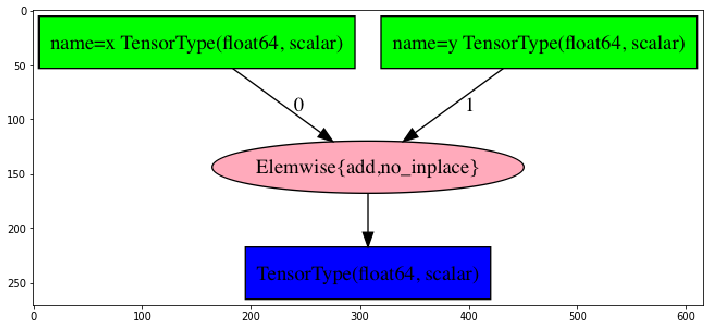

In [11]:
theano.printing.pydotprint(f,outfile="samplepydot.png")

mt.rcParams['figure.figsize'] = (12,6)
img01 = mpimg.imread('samplepydot.png')
p01   = plt.imshow(img01)
plt.show()

A *Variable* is the main data structure you work with when
using Theano. By calling `T.dscalar` with a string argument, you create a
`Variable` representing a floating-point scalar quantity with the
given name. If you provide no argument, the symbol will be unnamed. Names
are not required, but they can help debugging.

#### 1.5 Adding two matrices

Here we consider creating and using a Theano-function for adding two matrices of doubles. We will first define the Theano-function, note that we now need to use the Type ``dmatrix`` for the symbolic variable summands:

In [12]:
X = T.dmatrix('X')
Y = T.dmatrix('Y')
Z = X + Y
f = theano.function([X, Y], Z)

Now that we have our Theano-function defined, let's test it on adding up two 2D-arrays:

In [13]:
f([[1, 2], [3, 4]],[[10, 20], [30, 40]])

array([[ 11.,  22.],
       [ 33.,  44.]])

### 2. The logistic sigmoid function

#### 2.1 The function in NumPy

Let us now generate a vector of floating point values over which we would evaluate the logistic sigmoid function defined above and plot it.

In [14]:
# Generate 100 points equally spaced in [-5,5]
x = np.linspace(-5,5,100) 

In [15]:
def np_sigmoid(x):
    return 1./(1. + np.exp(-x)) # note: element-wise evaluation for non-scalars

# evaluate the logistic sigmoid function at each of the points
np_sigmoid_output = np_sigmoid(x)

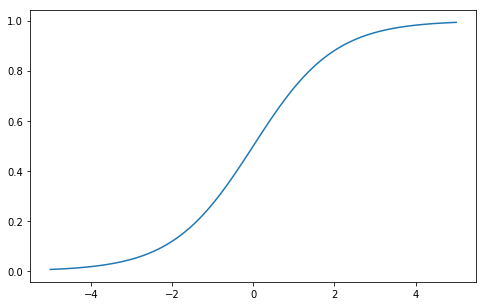

In [16]:
# plot the evalutions 
mt.rcParams['figure.figsize'] = (8,5)
plt.plot(x,np_sigmoid_output)
plt.show()

#### 2.2 The function in Theano
Let us now define the sigmoid function in **Theano**, note how similar it looks to the NumPy sigmoid function definition.

Note that there is an inbuilt function **theano.tensor.nnet.sigmoid** which we will be using in later part of the demo. 

In [17]:
# using the th_ prefix for theano symbolic variables and functions
th_x = T.dscalar('x') 
th_sigmoid = 1./(1. + T.exp(-th_x))

# using the th_ prefix to distinguish theano function names.
th_sigmoid_f = theano.function(inputs=[th_x], outputs=th_sigmoid) 

# We evaluate the theano function by looping over x.
th_sigmoid_output = []
for element in x:
    th_sigmoid_output.append(th_sigmoid_f(element))

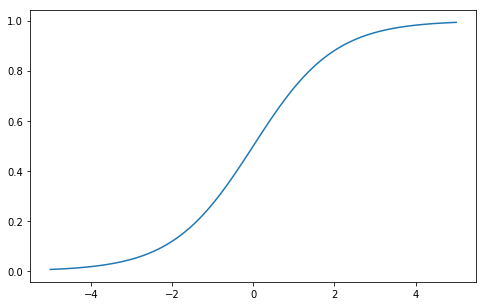

In [18]:
# Now we can plot the x evaluated using the sigmoid 
# function defined in theano
plt.plot(x,th_sigmoid_output)
plt.show()

#### _No surprise ! The plots look the same as before._
Let's quickly check their absolute error.

In [19]:
np.sum(abs(np_sigmoid_output - th_sigmoid_output))

0.0

#### 2.3 Analytical derivative in NumPy
We first (manually) derive the analytical form of the derivative of the logistic sigmoid function (denoted here $\mathrm{sigmoid}(\cdot)$). Using the knowledge 
that $\mathrm{sigmoid}(x) = (1+\exp(-x))^{-1}$ and that $\mathrm{sigmoid}(-x) = 1-\text{sigmoid(x)}$, we can write that 
$$
    \begin{split}
       \frac{\partial \mathrm{sigmoid}(x)}{\partial x} &= \frac{\partial (1+\exp(-x))^{-1}}{\partial x}  \\
        &= (-1)(1+\exp(-x))^{-2} \times \frac{\partial (1+\exp(-x))}{\partial x}  \\
        &= (-1)(1+\exp(-x))^{-2} \times \exp(-x) \times \frac{\partial (-x))}{\partial x}  \\
        &= \frac{1}{1+\exp(-x)} \times \frac{\exp(-x)}{1+\exp(-x)} \\
        &= \frac{1}{1+\exp(-x)} \times \left( 1 - \frac{1}{1+\exp(-x)} \right) \\ \\
        &= \mathrm{sigmoid}(x)(1-\mathrm{sigmoid}(x)).
    \end{split}
$$

We then use this result to implement a function for evaluating the derivative using **NumPy**:

In [20]:
def np_sigmoid_grad(x):
    return np_sigmoid(x)*(1.-np_sigmoid(x)) # note: element-wise evaluation for non-scalars

Let us now evaluate the function at each of the points defined by the NumPy-variable x, and plot the results:

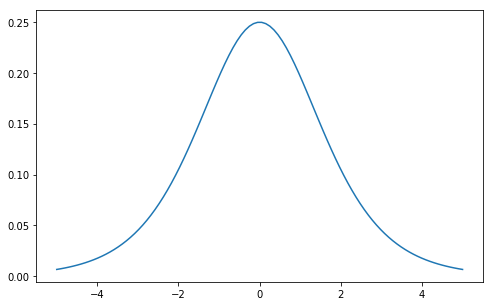

In [21]:
plt.plot(x, np_sigmoid_grad(x))
plt.show()

You can implement the analytically calculated gradient using Theano and the output would be same. Try it out for yourself !

#### 2.4 Symbolic differentiation in Theano
We will now use Theano's automatic differentiation `T.grad(cost,wrt)` to calculate the gradient of the sigmoid function 

**NOTE:** We will re-use the **sym_sigmoid** Theano expression for sigmoid defined earlier.

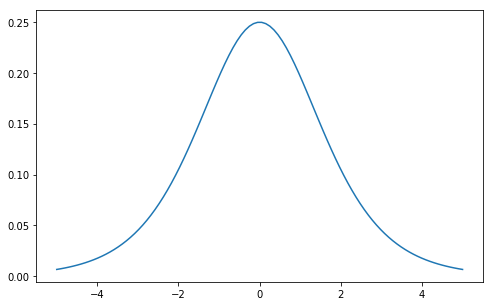

In [22]:
# T.grad computes derivative of 'th_sigmoid' function at values 'th_x'
th_sigmoid_grad = T.grad(th_sigmoid,th_x)
th_sigmoid_grad_f = theano.function(inputs=[th_x],
                                    outputs=th_sigmoid_grad)

th_sigmoig_grad_output = [th_sigmoid_grad_f(element) for element in x]
plt.plot(x, th_sigmoig_grad_output)
plt.show()

Looks same as the analytically calculated gradient !

### 3. Demo - Regression with a simple perceptron

#### 3.1 Training data

First lets load some simulated data for our exercise, here we use NumPy to create a noisy sine wave signal. 

We will be using the same structure for the data to be provided in the home assignment.

In [23]:
# load data
Xtrain = np.loadtxt("files/sinewave_Xtrain.txt") 
Ytrain = np.loadtxt("files/sinewave_Ytrain.txt") 
Xtest = np.loadtxt("files/sinewave_Xtest.txt") 
Ytest = np.loadtxt("files/sinewave_Ytest.txt") 


# reshape the dimensions
Xtrain = Xtrain.reshape(-1,1)
Xtest = Xtest.reshape(-1,1)

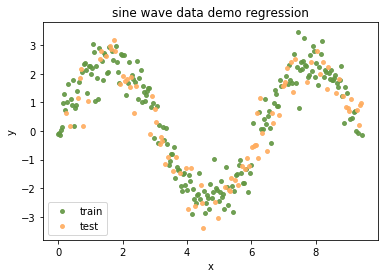

In [24]:
# visualize data
mt.rcParams['figure.figsize'] = (8,5)
% matplotlib inline
plt.scatter(Xtrain,Ytrain,c = "#639743",alpha = 0.9,s=15,label="train")
plt.scatter(Xtest,Ytest,c = "#ffad60",alpha = 0.9,s=15,label="test")
plt.title("sine wave data demo regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

The following block provides functionality to visualize training of single layer perceptrons with 1-D input. Understanding of the plotting code is not needed for the exercise. However don't forget to run the cell

In [25]:
def plotmodel1D(Xtrain, Ytrain, Xtest, Ytest, pred_train, pred_test, err_train,
                err_test, nactivation, training_steps):
    mt.rcParams['figure.figsize'] = (6, 8)
    '''
    Xtrain : N x 1 array : train input vector
    Ytrain : N x 1 array : train target vector
    Xtest  : N x 1 array : test input vector
    Ytest  : N x 1 array : test target vector
    pred_train : N x 1 array : predictions on train set
    pred_test  : N x 1 array : predictions on test set
    err_train  : scalar : error on train set for the current iteration
    err_test   : scalar : error on test set for the current iteration
    nactivation  : N x h array : activation output from 'h' hidden neurons on the training data
    training_steps : scalar : maximum number of iterations, to set the range of x axis in the beginning
    '''

    if plt.fignum_exists(121):
        fig = plt.figure(121)

        ax1 = fig.axes[0]
        ax1.lines[0].set_ydata(pred_train)

        ax2 = fig.axes[1]
        for line, nact in zip(ax2.lines, nactivation.T):
            line.set_ydata(nact)

        ax3 = fig.axes[2]
        ax3.lines[0].set_xdata(
            np.append(ax3.lines[0].get_xdata(),
                      ax3.lines[0].get_xdata()[-1] + 1000))
        ax3.lines[0].set_ydata(np.append(ax3.lines[0].get_ydata(),
                                         err_train))
        
        ax3.lines[1].set_xdata(
            np.append(ax3.lines[1].get_xdata(),
                      ax3.lines[1].get_xdata()[-1] + 1000))
        ax3.lines[1].set_ydata(np.append(ax3.lines[1].get_ydata(),
                                         err_test))

    else:
        itr = 1
        fig, (ax1, ax2, ax3) = plt.subplots(3, num=121)

        ax1.set_title("Demo : A simple perceptron")
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_xlim(1.3 * Xtrain.min(), 1.05 * Xtrain.max())
        ax1.set_ylim(1.3 * Ytrain.min(), 1.3 * Ytrain.max())
        ax1.scatter(
            Xtrain, Ytrain, c="#639743", alpha=0.5, s=15, label="train")
        ax1.scatter(Xtest, Ytest, c="#ffad60", alpha=0.5, s=15, label="test")
        ax1.plot(
            Xtrain,
            pred_train,
            "--",
            c="#970000",
            linewidth=2.0,
            label="model fit")
        ax1.legend(loc=4)

        ax2.set_xlabel('x')
        ax2.set_ylabel('hidden layer activations')
        ax2.set_ylim(-0.1, 1.1)
        ax2.plot(Xtrain, nactivation)

        ax3.set_xlabel('number of iterations')
        ax3.set_ylabel('mse')
        ax3.plot(itr, err_train, c="#27ae61", label="train")
        ax3.plot(itr, err_test, c="#c1392b", label="test")
        ax3.set_ylim(-1, max(err_train, err_test) * 1.2)
        ax3.set_xlim(1, training_steps * 1000)
        ax3.legend()

    fig.canvas.draw()

In the below section, a single layer perceptron with architecture as shown below is implemented. One hidden layer with sigmoidal activation function transforms data non-linearly. Outputs from each of these neuron is scaled with some weights along with a bias and summed to form the output.

#### 3.2 Architecture

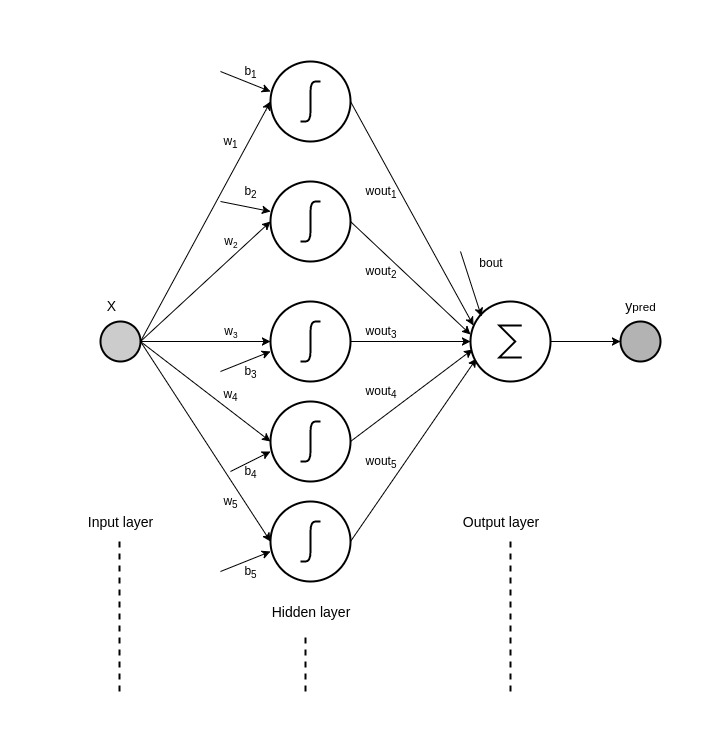

In [26]:
from IPython.display import Image
Image(filename='files/arch1.jpg',height=150,width=600)

#### 3.3 Formulas and implementation

Note that **bold**, **bold_i** represent vector valued variables

** Data :**

   **X**     : Input data (N x 1)
   
   **y**     : Target vector (N x 1)

** Parameters to be learned : **

   $\text{w}_i$     : Weight for $i^{th}$ input-hidden layer connection
   
   $\text{b}_i$     : Bias for $i^{th}$ hidden layer activations
   
   $\text{wout}_i$  : Weight for $i^{th}$ hidden-output layer connection
   
   $\text{bout}$  : Bias for output layer

**Forward pass computations:**

   $\textbf{hout}_i$ : Activation from $i^{th}$ neuron in the hidden layer (N x 1)
$$
    \begin{split}
        \textbf{hout}_i &= \text{sigmoid  }(\textbf{X} \cdot \text{w}_i+ \text{b}_i)
    \end{split}
$$

   **ypred** : Output layer as weighted sum of hidden layer activations, along with output layer bias (N x 1)
$$
    \begin{split}
        \textbf{ypred} &= \sum_i \textbf{hout}_i \cdot \text{wout}_i + \text{bout}
    \end{split}
$$  

**Cost function :**

 Mean squared error is considered as the cost function in this problem
$$
\begin{split}
    \text{cost} &= \frac{1}{N} \sum_{j = 1} ^N (\text{y}_j - \text{ypred}_j)^2
\end{split}
$$

** Parameter updates for backpropagation:**

  We will be using gradient descent backpropagation algorithm. In gradient descent, after every iteration, we look at negative slope (the direction in which the cost function reduces) and take small steps in that direction. The step size is defined by a parameter $\alpha$ (also called as learning rate). 
  
  Every parameter to be learned is updated after t^th iteration according to the following formula
    
$$
\begin{split}
   \text{param}_{t+1} &= \text{param}_t - \alpha \cdot \text{gradient} \\
   \text{gradient} &= \frac{\partial \text{ (cost) }}{\partial \text{ param }}\\
\end{split}
$$

Now lets go ahead and implement this in Theano

In [27]:
# define input and output variables in Theano
# value: input data
# shape : N x 1  (same as NumPy array)
X = T.matrix('X') 

# value : target vector
# shape : N x __ (same as NumPy array)
y = T.vector('y') # will have N x __ shape


# parameters to be set for the architecture/training
nn1 = 4 # NumberOfHiddenNeurons
training_steps = 50000  # number of training iterations
alpha = 0.1  # learning rate


# NOTE : 
# variables of theano type 'dmatrix' are not broadcastable
# initializing a theano shared variable with a NumPy array of shape (N,1) makes it a 'dmatrix'
# whenever broadcasting is needed, initialize it as a vector
# initializing a theano shared variable with a NumPy array of shape (N,) makes it a 'dvector'

# weights for input - the hidden layer connection
# value : random gaussian initialization
# shape : (1 x NumberOfHiddenNeurons)
# type  : dmatrix
np.random.seed(1232)
w1 = theano.shared(np.random.randn(1, nn1), name='w1') 


# bias to neurons in the hidden layer
# value : initialized to zeros
# shape : (NumberOfHiddenNeurons x __)
# type  : dvector
b1 = theano.shared(np.zeros((nn1,)), name='b1')       


# weights for hidden - output layer connection
# value : random gaussian initialization
# shape : (NumberOfHiddenNeurons x __)
# type  : dvector
np.random.seed(1232)
wout = theano.shared(
    np.random.randn(nn1,), name='wout')                           


# bias to output layer
# value : initialized to zero
# shape : (1 x __)
# type  : dvector
bout = theano.shared(0., name='bout') 


# hidden layer output
# value :  X*w1 + b1 
# shape : (N x 1)*(1 x NumberOfHiddenNeurons) + (NumberOfHiddenNeurons x __)
#       : (N x NumberOfHiddenNeurons) + (NumberOfHiddenNeurons x __) {BROADCAST}
#       : (N x NumberOfHiddenNeurons) 
# type  : dmatrix
# http://deeplearning.net/software/theano/tutorial/broadcasting.html
hout = theano.tensor.nnet.sigmoid(T.dot(X, w1) + b1)   


# perceptron predictions
# value : hout * wout + bout
# shape : (N x NumberOfHiddenNeurons) * (NumberOfHiddenNeurons x __) + (1 X __)
#       : (N x __) + (1 X __) {BROADCAST}
#       : (N x __)
# type  : dvector
# --- Note that ypred is of same shape as y --- 
ypred = T.dot(hout, wout) + bout
test = theano.function(inputs=[X], outputs=[ypred])


# mean squared error as cost function
cost = T.mean((ypred - y)**2)


# gradient computation : gradient of cost function with respect to weights & bias
# used for parameter updates according to gradient descent algorithm
gw1, gb1, gwout, gbout = T.grad(cost, [w1, b1, wout, bout])


# now we connect everything into a single theano function
# Input   :  X, y are input data, target vector respectively
# Output  :  prediction, cost (error) and hidden-layer activations
# Update  :  update equation for parameters to be learned : w_t+1 = w_t - (learning_rate * gradient)
updates  =  [(w1, w1 - alpha * gw1), 
             (b1, b1 - alpha * gb1),
             (wout, wout - alpha * gwout), 
             (bout, bout - alpha * gbout)] 

train_model = theano.function(
    inputs=[X, y],
    outputs=[ypred, cost, hout,wout,bout],
    updates=updates)


# function 
# compute prediction on unseen test data
# Input   : x, y are input, target vectors respectively
# Output  :  list of predictions
predict_model = theano.function(inputs=[X], outputs=[ypred])


# function 
# compute cost on test data
# Input   : x, y are input, target vectors respectively
# Output  : scalar cost
cost_function = theano.function(inputs=[X,y], outputs=cost)

#### 3.4 Training and visualization

Till now, we have defined everything in Theano as symbolic variables. Next we execute *train_model* function defined in Theano with NumPy arrays Xtrain and Ytrain as inputs. 

Function is called iteratively, gradients of cost w.r.t weight/bias parameters are computed after each iteration. Parameters are updated according to the '*updates*' argument eventually learning values that minimize the cost function.

Then *predict_model* function is used to get model predictions on the test set and errors on both training and test set across iterations. 

<IPython.core.display.Javascript object>


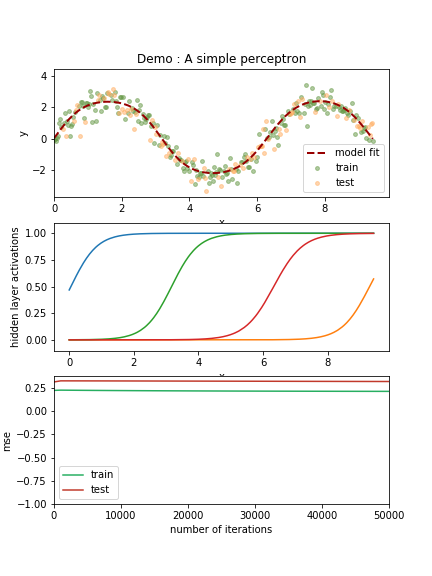

Iteration      1 --  Training cost:  0.2240
[  2.79767341e-03   9.23986340e-02   1.82746962e-01   2.73536802e-01
   3.64456024e-01   4.55190454e-01   5.45428155e-01   6.34863647e-01
   8.10162202e-01   8.95481208e-01   1.06024659e+00   1.13927703e+00
   1.21583726e+00   1.28978332e+00   1.36099754e+00   1.42938803e+00
   1.49488784e+00   1.61706438e+00   1.77824703e+00   1.87136100e+00
   1.91379390e+00   1.95357938e+00   1.99080233e+00   2.05792192e+00
   2.08800556e+00   2.11589804e+00   2.14169350e+00   2.16548450e+00
   2.18736116e+00   2.20741047e+00   2.22571569e+00   2.24235587e+00
   2.25740547e+00   2.27093402e+00   2.30300999e+00   2.31104364e+00
   2.31782317e+00   2.32338509e+00   2.33097327e+00   2.33304371e+00
   2.33398491e+00   2.33008148e+00   2.32652547e+00   2.30888041e+00
   2.30058461e+00   2.29102341e+00   2.28015344e+00   2.25428605e+00
   2.23917457e+00   2.20427175e+00   2.16263933e+00   2.11362776e+00
   2.08613526e+00   1.99059283e+00   1.95407196e+00   1.873

Iteration   3000 --  Training cost:  0.2255
[ 0.0253866   0.1154867   0.2062957   0.29750885  0.38881567  0.47990414
  0.57046491  0.6601954   0.83601249  0.92156165  1.08674545  1.16597024
  1.24271856  1.31684884  1.38824543  1.45681813  1.52250131  1.64505172
  1.80681866  1.90033654  1.94297429  1.98296568  2.02039483  2.08792461
  2.11821068  2.1463028   2.17229445  2.19627753  2.21834159  2.23857312
  2.25705495  2.27386576  2.28907974  2.30276619  2.33527604  2.34344106
  2.35034551  2.3560261   2.36383399  2.36600621  2.36704439  2.36340853
  2.35993607  2.34253579  2.3343227   2.32484654  2.31406508  2.2883903
  2.27338571  2.23872551  2.19738545  2.14873071  2.12144572  2.02666691
  1.99045455  1.91054358  1.82006434  1.77066002  1.7183859   1.66318387
  1.60500749  1.54382388  1.47961557  1.41238237  1.34214312  1.2689373
  1.19282649  1.1138955   0.94803343  0.77251845  0.68161226  0.39909538
  0.30254388  0.2052828  -0.18473976 -0.28095601 -0.46978071 -0.56185032
 -0.74009

Iteration   7000 --  Training cost:  0.2233
[ 0.02464499  0.11496507  0.20594151  0.29727251  0.38865128  0.4797701
  0.57032445  0.66001693  0.83568501  0.92113413  1.086093    1.16520246
  1.2418392   1.31586522  1.3871679   1.45565952  1.52127632  1.64374292
  1.80551193  1.89911141  1.94181099  1.9818764   2.01939029  2.08711528
  2.11750863  2.14571238  2.17181845  2.1959173   2.21809708  2.23844297
  2.25703659  2.27395549  2.28927284  2.303057    2.33581801  2.34405049
  2.35101336  2.35674286  2.36461855  2.36680908  2.36785486  2.36417628
  2.36066755  2.34309298  2.33480048  2.32523464  2.31435358  2.28845149
  2.27332023  2.23838387  2.1967426   2.14776952  2.12032188  2.02505816
  1.98869051  1.90848912  1.81775921  1.76824939  1.71588567  1.66061182
  1.60238324  1.54116871  1.47695227  1.40973495  1.33953656  1.26639718
  1.19037859  1.11156542  0.94601255  0.77089465  0.68021428  0.39844588
  0.30215488  0.20515286 -0.18393397 -0.2799617  -0.468488   -0.56045284
 -0.7385

Iteration  11000 --  Training cost:  0.2216
[ 0.02385749  0.11440658  0.20556063  0.29702062  0.38848324  0.47964484
  0.57020545  0.6598726   0.83541591  0.92077601  1.08552867  1.16453014
  1.24106107  1.31498699  1.38619824  1.45460953  1.52015904  1.64253522
  1.80428601  1.89794834  1.94069927  1.98082772  2.018415    2.08631208
  2.11680121  2.14510528  2.1713148   2.19551886  2.21780432  2.23825514
  2.25695178  2.27397076  2.28938425  2.30325973  2.33625811  2.34455535
  2.3515749   2.35735255  2.36529751  2.36750856  2.36856517  2.36485944
  2.36132155  2.34359956  2.33523835  2.32559435  2.31462598  2.28852326
  2.2732796   2.2380971   2.196186    2.14692639  2.11933184  2.02362777
  1.98711818  1.90664969  1.81568638  1.76607692  1.71362727  1.65828294
  1.60000094  1.53875158  1.47452023  1.40730908  1.33713881  1.2640501
  1.18810501  1.10938803  0.94409319  0.76931244  0.67882554  0.39770479
  0.30164122  0.20486642 -0.18338855 -0.27924535 -0.46749569 -0.55936012
 -0.7373

Iteration  15000 --  Training cost:  0.2201
[ 0.02299849  0.11378842  0.20513308  0.29673602  0.38829714  0.47951662
  0.57009874  0.65975567  0.83520283  0.92048689  1.08505545  1.16395766
  1.24038979  1.31422078  1.3853439   1.45367629  1.51915807  1.64143766
  1.80314948  1.89685488  1.939646    1.97982574  2.01747418  2.08551824
  2.11609054  2.14448247  2.17078326  2.19508075  2.21746061  2.23800564
  2.25679527  2.27390501  2.28940613  2.30336526  2.33658352  2.34494163
  2.35201496  2.35783889  2.36585249  2.36808531  2.36915503  2.36543519
  2.36187453  2.34403011  2.33561038  2.32589931  2.31485553  2.28857834
  2.27323639  2.23783768  2.19568838  2.14617472  2.11844949  2.0223519
  1.98571482  1.90500513  1.81382904  1.76412773  1.71159799  1.65618686
  1.59785279  1.53656743  1.47231736  1.4051058   1.33495424  1.26190392
  1.18601717  1.10737842  0.94229784  0.76780145  0.67747904  0.39691351
  0.30104632  0.20446843 -0.18305832 -0.27876339 -0.4667654  -0.55853737
 -0.7364

Iteration  19000 --  Training cost:  0.2189
[ 0.02206771  0.11310974  0.20465745  0.29641674  0.38809052  0.47938251
  0.57000099  0.65966246  0.83504162  0.92026252  1.08466912  1.16348097
  1.23982158  1.31356317  1.38460191  1.45285735  1.51827157  1.64044976
  1.80210413  1.89583438  1.9386553   1.97887526  2.01657334  2.08474045
  2.11538383  2.14385162  2.17023189  2.19461134  2.21707454  2.23770326
  2.25657592  2.27376715  2.28934732  2.30338233  2.33680219  2.34521688
  2.35234066  2.35820848  2.36628886  2.36854401  2.36962837  2.36590492
  2.36232691  2.34438194  2.33591279  2.32614456  2.31503613  2.28860818
  2.27318082  2.23759341  2.19523517  2.1454977   2.11765701  2.02121028
  1.98445955  1.90353392  1.81216582  1.7623809   1.70977762  1.65430436
  1.59592085  1.53459993  1.47032925  1.40311294  1.33297322  1.25995186
  1.18411145  1.10553643  0.9406339   0.76637732  0.67619461  0.39610404
  0.30040588  0.20399794 -0.18289527 -0.27846694 -0.46624854 -0.55793715
 -0.735

Iteration  23000 --  Training cost:  0.2178
[ 0.02107749  0.11238061  0.20414159  0.29606847  0.38786697  0.47924409
  0.56991187  0.65959089  0.83492725  0.92009664  1.08436169  1.16309156
  1.23934759  1.31300524  1.38396349  1.45214427  1.51749161  1.63956518
  1.80114697  1.89488649  1.93772818  1.9779787   2.01571627  2.08398521
  2.11468886  2.14322174  2.16967086  2.19412189  2.21665837  2.23736114
  2.25630771  2.27357184  2.28922314  2.30332674  2.33693083  2.34539789
  2.35256874  2.35847794  2.36662268  2.36890025  2.37000024  2.36628141
  2.36269055  2.34466356  2.33615277  2.32633596  2.31517216  2.28861412
  2.27311263  2.23736063  2.19481926  2.14488481  2.11694219  2.02018608
  1.98333421  1.90221567  1.81067489  1.76081419  1.7081438   1.65261326
  1.59418343  1.5328282   1.46853616  1.40131227  1.33117942  1.25817983
  1.18237636  1.10385347  0.93909956  0.76504598  0.6749823   0.39529908
  0.29974664  0.2034856  -0.18285653 -0.27831122 -0.46589813 -0.55751227
 -0.735

Iteration  27000 --  Training cost:  0.2169
[ 0.02004429  0.11161477  0.20359649  0.29569952  0.38763217  0.47910454
  0.5698322   0.65953957  0.83485445  0.91998241  1.08412385  1.16277927
  1.23895713  1.31253599  1.38341757  1.45152616  1.51680775  1.63877493
  1.80027242  1.89400847  1.93686341  1.9771364   2.01490488  2.08325757
  2.11401221  2.14260088  2.16910964  2.19362319  2.21622418  2.23699255
  2.25600498  2.27333443  2.28904977  2.30321546  2.33698802  2.34550356
  2.3527183   2.35866644  2.3668729   2.36917273  2.37028895  2.36658114
  2.36298108  2.34488745  2.33634158  2.32648341  2.31527213  2.28860158
  2.27303556  2.23713965  2.19443733  2.14432904  2.11629622  2.01926527
  1.9823232   1.90103202  1.80933575  1.75940639  1.70667481  1.65109159
  1.5926186   1.53123065  1.46691718  1.39968389  1.32955424  1.25657092
  1.18079701  1.10231703  0.93768797  0.76380727  0.67384562  0.39451363
  0.29908744  0.20295394 -0.1829071  -0.27825897 -0.46567381 -0.55722153
 -0.734

Iteration  31000 --  Training cost:  0.2161
[ 0.01898431  0.11082576  0.20303307  0.29531821  0.3873919   0.47896719
  0.56976296  0.65950728  0.83481816  0.91991316  1.0839464   1.162534
  1.23863942  1.31214424  1.38295283  1.45099179  1.51620903  1.63806926
  1.79947381  1.89319627  1.93605838  1.97634718  2.01413949  2.08256086
  2.11335868  2.14199529  2.16855585  2.19312422  2.21578219  2.2366089
  2.25568023  2.27306843  2.28884167  2.30306376  2.33699086  2.34555138
  2.35280712  2.35879193  2.36705748  2.36937923  2.370512    2.36682015
  2.36321384  2.34506627  2.33649078  2.3265973   2.31534515  2.28857687
  2.27295446  2.23693213  2.1940877   2.14382527  2.11571225  2.01843606
  1.9814132   1.89996689  1.80813013  1.75813837  1.70535088  1.64971917
  1.591206    1.52978701  1.46545241  1.39820854  1.32807943  1.25510813
  1.17935797  1.10091351  0.93639009  0.76265767  0.67278407  0.39375697
  0.29844087  0.20241882 -0.18301982 -0.27828089 -0.46554304 -0.5570314
 -0.7345594

Iteration  35000 --  Training cost:  0.2154
[ 0.01791167  0.11002542  0.20246088  0.2949318   0.3871512   0.47883491
  0.56970497  0.65949289  0.83481377  0.91988278  1.0838209   1.16234645
  1.23838452  1.3118196   1.38255866  1.45053054  1.51568505  1.63743871
  1.7987442   1.89244516  1.93530957  1.97560884  2.01341921  2.0818968
  2.11273131  2.14140927  2.16801507  2.19263175  2.21534034  2.23621919
  2.2553435   2.2727848   2.28861063  2.3028842   2.33695369  2.34555608
  2.35285024  2.35886964  2.3671918   2.36953505  2.37068451  2.36701243
  2.36340226  2.34521119  2.33661062  2.32668687  2.31539938  2.28854581
  2.27287385  2.23673988  2.19376929  2.14336945  2.11518472  2.01768852
  1.98059292  1.89900649  1.8070422   1.75699349  1.70415473  1.64847825
  1.58992763  1.52847925  1.46412399  1.39686881  1.32673821  1.25377562
  1.17804458  1.09962973  0.9351963   0.76159201  0.67179495  0.39303443
  0.297815    0.20189098 -0.18317433 -0.27835471 -0.4654806  -0.55691565
 -0.7343

Iteration  39000 --  Training cost:  0.2148
[ 0.01683755  0.10922312  0.20188745  0.29454599  0.38691396  0.47870982
  0.56965862  0.6594952   0.83483718  0.91988595  1.08373997  1.16220849
  1.23818372  1.31155299  1.38222576  1.45013306  1.51522656  1.63687473
  1.79807703  1.89175043  1.93461329  1.9749187   2.01274244  2.08126601
  2.11213181  2.14084565  2.16749115  2.19215065  2.21490444  2.23583019
  2.2550024   2.27249197  2.28836584  2.30268663  2.33688789  2.34552943
  2.35285969  2.35891183  2.36728824  2.36965252  2.37081869  2.3671693
  2.36355721  2.34533128  2.33670942  2.32675964  2.31544145  2.28851306
  2.27279732  2.23656421  2.19348099  2.14295795  2.11470877  2.01701409
  1.97985264  1.89813899  1.80605834  1.75595741  1.70307143  1.6473535
  1.58876787  1.52729165  1.46291632  1.39564937  1.32551577  1.25255927
  1.17684364  1.09845356  0.93409731  0.7606045   0.67087447  0.39234866
  0.2972147   0.20137754 -0.18335559 -0.27846382 -0.46546734 -0.55685424
 -0.73424

Iteration  43000 --  Training cost:  0.2143
[ 0.01577048  0.10842596  0.20131846  0.29416504  0.386683    0.47859335
  0.56962401  0.65951296  0.83488481  0.91991805  1.08369731  1.16211317
  1.23802958  1.31133659  1.38194609  1.44979124  1.51482551  1.63636976
  1.79746631  1.89110751  1.93396576  1.97427385  2.01210713  2.08066825
  2.11156084  2.14030593  2.1669865   2.19168417  2.21447857  2.23544672
  2.25466249  2.27219617  2.28811413  2.30247846  2.33680223  2.34548048
  2.35284478  2.35892798  2.36735646  2.36974128  2.37092408  2.36729963
  2.3636872   2.3454336   2.33679363  2.32682136  2.3154764   2.28848206
  2.27272745  2.23640585  2.19322155  2.14258747  2.11428003  2.01640535
  1.97918397  1.89735424  1.80516691  1.75501789  1.70208825  1.64633176
  1.58771334  1.5262107   1.46181591  1.39453695  1.32439919  1.2514467
  1.17574345  1.09737421  0.93308453  0.75968934  0.67001836  0.39170056
  0.29664268  0.20088295 -0.1835527  -0.278596   -0.46548897 -0.55683211
 -0.7341

Iteration  46000 --  Training cost:  0.2139
[ 0.01497865  0.10783468  0.20089719  0.29388438  0.38651511  0.47851219
  0.56960562  0.65953568  0.83493452  0.91995869  1.08368718  1.16206607
  1.23794074  1.31120318  1.38176708  1.44956715  1.51455819  1.63602572
  1.797042    1.89065669  1.93350986  1.97381811  2.01165646  2.08024109
  2.11115126  2.13991722  2.16662145  2.19134512  2.21416738  2.23516477
  2.25441072  2.2719751   2.28792385  2.30231871  2.33672895  2.34543331
  2.35282192  2.35892741  2.36739359  2.3697935   2.37098868  2.3673841
  2.36377228  2.34550192  2.33685016  2.32686303  2.31550021  2.28846144
  2.27268048  2.23629857  2.19304504  2.14233464  2.11398706  2.01598798
  1.97872506  1.89681466  1.80455292  1.75437024  1.70140992  1.64562622
  1.58698452  1.52546295  1.46105397  1.39376592  1.32362444  1.25067385
  1.17497823  1.09662243  0.93237678  0.75904706  0.66941591  0.3912391
  0.29623297  0.20052602 -0.18370616 -0.27870484 -0.46552161 -0.55683443
 -0.73411

Iteration  50000 --  Training cost:  0.2135
[ 0.01393779  0.10705809  0.20034511  0.29351859  0.38629935  0.47841253
  0.56959084  0.65957749  0.83501722  0.92003219  1.08369909  1.16203171
  1.23785357  1.31105922  1.38156464  1.44930655  1.51424151  1.6356086
  1.79651729  1.89009422  1.93293889  1.97324528  2.0110881   2.07969881
  2.11062956  2.13942038  2.16615314  2.19090843  2.21376478  2.23479817
  2.25408145  2.27168394  2.28767108  2.30210412  2.33662321  2.34536067
  2.35278022  2.3589142   2.36742898  2.36984856  2.37106009  2.36748321
  2.36387317  2.34558501  2.33691959  2.32691497  2.3155309   2.28843873
  2.27262587  2.23617061  2.19283249  2.14202845  2.11363151  2.01547901
  1.97816472  1.89615432  1.80379999  1.75357526  1.70057652  1.64475859
  1.58608743  1.52454171  1.46011436  1.39281415  1.3226671   1.24971779
  1.17403051  1.09569015  0.9314965   0.75824518  0.66866201  0.39065589
  0.29571266  0.20006993 -0.18391364 -0.27885759 -0.46558055 -0.55685587
 -0.7340

In [29]:
%matplotlib notebook

# call traning function for pre-defined iterations
for ii in np.arange(1,training_steps+1):

    # run train function and get predictions and error on train set
    # nactivation is the hidden layer neuron activations for the second subplot
    # nwout, nbout are hidden-output layer weights and bias respectively
    pred_train, cost_train, nactivation, nwout, nbout = train_model(Xtrain, Ytrain)

    # get predictions on test set
    pred_test = predict_model(Xtest)
    cost_test = cost_function(Xtest,Ytest)

    if (ii==1 or ii % 1000 == 0):
        plotmodel1D(Xtrain, Ytrain, Xtest, Ytest, 
                    pred_train, pred_test, cost_train, cost_test,
                    nactivation, training_steps/1000)
        print("Iteration %6s -- "%ii,'Training cost: ',"%4.4f"%cost_train)
        print(pred_train)

print("final train set cost : %.4f"%cost_train)
print("final test set cost  : %.4f"%cost_test)
print("output layer weights : ",nwout)
print("output layer bias : ",nbout)